
<h1 align="center">Homework 2 - How do Taxis move in NYC?</h1>

<p>In this assignment we perform an analysis of Taxis in NYC. In particular, we Work on specific research questions (RQs) that may help Taxi drivers in planning their movements throughout the city and the Taxi's users to have hints about the convenience of enjoying this service.

For this purpose we use the open data of Taxi's trips in NYC. In order to answer to the RQs we take into account the data related to Yellow cab for the year 2018 for the month of January.</p>
<p>The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.</p>

<h1>Exploratory Data Analysis</h1>


<h2>Libraries</h2>

Let's start importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import scipy.stats as stats
from pandas import DataFrame, read_csv

<h1>RQ1</h1>

[RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

<h2>Load Datasets in CSV format</h2>
<p>We Download Yellow cabs data  from <a>"NYC Taxi & Limousine Commission"</a></p>
<p>Download the datasets 2018 January month	Yellow Dataset and save it to local files.</p>

In [4]:
# Location indicates the place where we save my monthly data
Location_Jan = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-01.csv"
Location_Feb = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-02.csv"
Location_Mar = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-03.csv"
Location_Apr = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-04.csv"
Location_May = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-05.csv"
Location_Jun = r"C:\Users\ValerioV\Downloads\yellow_tripdata_2018-06.csv"

In [5]:
# Location_taxi_zone indicates the place where we save dataframe about New York's Boroughs and their Location ID
Location_taxi_zone = r"C:\Users\ValerioV\Downloads\taxi _zone_lookup.csv"

<p>In order to do the analysis by borough we need to combine the Yellow cabs data with the dataset we download the file from Taxi Zone Maps and Lookup Tables (taxi_zone_lookup.csv) </p>

In [6]:
# We've uploaded all available monthly dataframes of year 2018
nytaxi_january = pd.read_csv(Location_Jan, usecols=[1,7])
nytaxi_february = pd.read_csv(Location_Feb, usecols=[1,7])
nytaxi_march = pd.read_csv(Location_Mar, usecols=[1,7])
nytaxi_april = pd.read_csv(Location_Apr, usecols=[1,7])
nytaxi_may = pd.read_csv(Location_May, usecols=[1,7])
nytaxi_june = pd.read_csv(Location_Jun, usecols=[1,7])

In [7]:
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1])

In [8]:
# Now we need to add a new column with the indication of the Borough. We decide to use the pick up location as reference
taxi_and_Borough_january=nytaxi_january.join(nyBorough.set_index('LocationID'), on='PULocationID')


In [9]:
taxi_and_Borough_january[:3]

,tpep_pickup_datetime,PULocationID,Borough
0,2018-01-01 11:22:49,7,Queens
1,2018-01-01 11:53:13,261,Manhattan
2,2018-01-01 11:02:02,237,Manhattan


In [10]:
# Now we need to add a new column with the indication of the Borough. We decide to use the pick up location as reference
taxi_and_Borough_january=nytaxi_january.join(nyBorough.set_index('LocationID'), on='PULocationID')


In [11]:
# Here we group january data by borough and we compute montlhy average of trips 
january_average =taxi_and_Borough_january['Borough'].value_counts()/31


In [13]:
# We create a dataframe with january average for each borough
january_average=pd.DataFrame(january_average)

In [14]:
january_average

,Borough
Manhattan,2841.322581
Queens,269.451613
Unknown,76.645161
Brooklyn,35.322581
Bronx,2.258065
EWR,0.774194
Staten Island,0.032258


In [15]:
# We decide to cut down from our analysis values that have unkown borough]
january_average = january_average.drop('Unknown', axis=0)


In [16]:
january_average

,Borough
Manhattan,2841.322581
Queens,269.451613
Brooklyn,35.322581
Bronx,2.258065
EWR,0.774194
Staten Island,0.032258


In [17]:
# We denomite column with the name 'January'
january_average.columns=['January']

In [18]:
# Let's to visualize january average of taxis trips for each borough
january_average

,January
Manhattan,2841.322581
Queens,269.451613
Brooklyn,35.322581
Bronx,2.258065
EWR,0.774194
Staten Island,0.032258


In [19]:
# For a better visualization, we decide to round values with two decimal places
january_average = round(january_average,2)  


In [20]:
january_average

,January
Manhattan,2841.32
Queens,269.45
Brooklyn,35.32
Bronx,2.26
EWR,0.77
Staten Island,0.03


In [21]:
# Now, we are going to compute others monthly averages replacing the same steps
taxi_and_Borough_february=nytaxi_february.join(nyBorough.set_index('LocationID'), on='PULocationID')

In [22]:
february_average = taxi_and_Borough_february['Borough'].value_counts()/28


In [23]:
february_average=pd.DataFrame(february_average)


In [24]:
february_average = february_average.drop('Unknown', axis=0)


In [25]:
february_average.columns=['February']


In [26]:
february_average = round(february_average,2)  


In [27]:
february_average

,February
Manhattan,3066.46
Queens,381.32
Brooklyn,44.43
Bronx,5.50
EWR,0.32
Staten Island,0.14


In [28]:
taxi_and_Borough_march=nytaxi_march.join(nyBorough.set_index('LocationID'), on='PULocationID')


In [30]:
march_average = taxi_and_Borough_march['Borough'].value_counts()/31


In [31]:
march_average=pd.DataFrame(march_average)


In [32]:
march_average = march_average.drop('Unknown', axis=0)


In [33]:
march_average.columns=['March']


In [34]:
march_average = round(march_average,2)  


In [35]:
march_average


,March
Manhattan,2894.35
Queens,239.87
Brooklyn,19.65
Bronx,2.77
EWR,0.32


In [36]:
taxi_and_Borough_april=nytaxi_april.join(nyBorough.set_index('LocationID'), on='PULocationID')

In [37]:
april_average = taxi_and_Borough_april['Borough'].value_counts()/30

In [38]:
april_average=pd.DataFrame(april_average)

In [39]:
april_average = april_average.drop('Unknown', axis=0)

In [40]:
april_average.columns=['April']

In [41]:
april_average = round(april_average,2) 

In [42]:
april_average 

,April
Manhattan,2893.23
Queens,326.50
Brooklyn,37.23
Bronx,2.63
EWR,0.23


In [43]:
taxi_and_Borough_may=nytaxi_may.join(nyBorough.set_index('LocationID'), on='PULocationID')

In [44]:
may_average= taxi_and_Borough_may['Borough'].value_counts()/31

In [45]:
may_average=pd.DataFrame(may_average)

In [46]:
may_average = may_average.drop('Unknown', axis=0)

In [47]:
may_average.columns=['May']

In [48]:
may_average = round(may_average,2)  

In [49]:
may_average

,May
Manhattan,2948.68
Queens,179.13
Brooklyn,27.00
Bronx,3.00
EWR,0.16


In [50]:
taxi_and_Borough_june=nytaxi_june.join(nyBorough.set_index('LocationID'), on='PULocationID')


In [51]:
june_average= taxi_and_Borough_june['Borough'].value_counts()/30

In [52]:
june_average=pd.DataFrame(june_average)

In [53]:
june_average = june_average.drop('Unknown', axis=0)

In [54]:
june_average.columns=['June']

In [55]:
june_average = round(june_average,2)  

In [56]:
june_average

,June
Manhattan,3003.07
Queens,220.87
Brooklyn,32.40
Bronx,1.60
EWR,0.47


In [57]:
# Now, we create a dataframe which contains monthly averages of taxis trips for each borough
monthly_average=pd.concat([january_average,february_average,march_average,april_average,may_average,june_average], axis=1,sort=True)

In [58]:
monthly_average

,January,February,March,April,May,June
Bronx,2.26,5.50,2.77,2.63,3.00,1.60
Brooklyn,35.32,44.43,19.65,37.23,27.00,32.40
EWR,0.77,0.32,0.32,0.23,0.16,0.47
Manhattan,2841.32,3066.46,2894.35,2893.23,2948.68,3003.07
Queens,269.45,381.32,239.87,326.50,179.13,220.87
Staten Island,0.03,0.14,NaN,NaN,NaN,NaN


In [60]:
# We need to traspose this dataframe 
monthly_average_trasposed= monthly_average.T   

In [61]:
monthly_average_trasposed

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
January,2.26,35.32,0.77,2841.32,269.45,0.03
February,5.50,44.43,0.32,3066.46,381.32,0.14
March,2.77,19.65,0.32,2894.35,239.87,NaN
April,2.63,37.23,0.23,2893.23,326.50,NaN
May,3.00,27.00,0.16,2948.68,179.13,NaN
June,1.60,32.40,0.47,3003.07,220.87,NaN


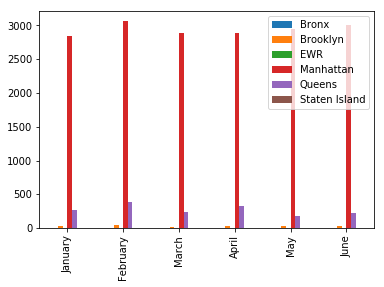

In [62]:
monthly_average_trasposed.plot.bar()

<p>The chart shows that FEBRUARY is the month which taxis are used more. The monthly average of taxis trips is very high: in New York, in February, there are about 3000 taxis trips in mean. The second monthly average plus high is in May.
To observe the trend for each borough, let's to plot different charts.</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9D23E56A0>,
      dtype=object)

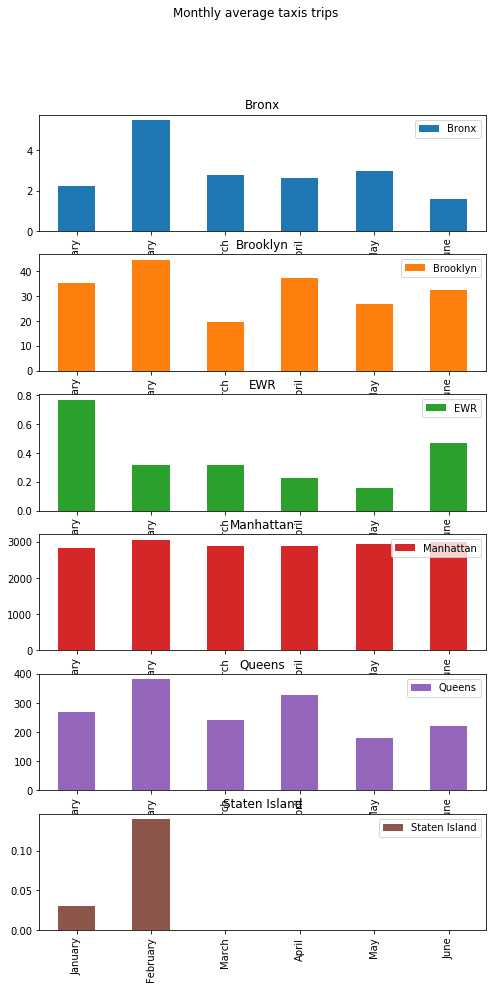

In [63]:
monthly_average_trasposed.plot.bar(subplots=True, figsize=(8,15), sharex=False, title='Monthly average taxis trips')

<h1>Considerations:</h1>




<li>Manhattan has the biggest montly average taxis trips. This because Manhattan is New York's economic and administrative center. This borough, reading on Wikipedia, is often described as the cultural, financial, media, and entertainment capital of the world.

<li>Staten Island has the smallest monthly average taxis trips. A possible reading-key is that in this borough there's a ferry that connects Staten island with Manhattan. Ferry's ticket is free and there are two races at hours.

<h1>RQ2</h1>

[RQ2] What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

In [65]:
nytaxi = pd.read_csv(Location_Jan, usecols=[1,3,7]) 
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Feb, usecols=[1,3,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Mar, usecols=[1,3,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Apr, usecols=[1,3,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_May, usecols=[1,3,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Jun, usecols=[1,3,7])])
nytaxi.head()

,tpep_pickup_datetime,passenger_count,PULocationID
0,2018-01-01 11:22:49,2,7
1,2018-01-01 11:53:13,2,261
2,2018-01-01 11:02:02,2,237
3,2018-01-01 11:13:44,2,163
4,2018-01-01 11:33:51,4,48


In [66]:
taxi_and_Borough=nytaxi.join(nyBorough.set_index('LocationID'), on='PULocationID')

<p>In order to make calculations with dates, we need to convert the column type to 'datetime' 

In [67]:
taxi_and_Borough.tpep_pickup_datetime = pd.to_datetime(taxi_and_Borough.tpep_pickup_datetime)


In [68]:
# We have removed trips started before 2018 and after Jann 2018
taxi_and_Borough = taxi_and_Borough[(taxi_and_Borough['tpep_pickup_datetime'].dt.year == 2018) & (taxi_and_Borough['tpep_pickup_datetime'].dt.month == 1)]

In [69]:
taxi_and_Borough[:3]

,tpep_pickup_datetime,passenger_count,PULocationID,Borough
0,2018-01-01 11:22:49,2,7,Queens
1,2018-01-01 11:53:13,2,261,Manhattan
2,2018-01-01 11:02:02,2,237,Manhattan


<p>Group by hour of the day and borough, and count trip

In [70]:
df_grouped = taxi_and_Borough.groupby([taxi_and_Borough.tpep_pickup_datetime.dt.hour,'Borough'])['passenger_count'].count()

In [71]:
df_grouped = df_grouped.unstack()

In [72]:
df_grouped

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
tpep_pickup_datetime,,,,,,,
0,16.0,148.0,NaN,6253.0,1540.0,NaN,170.0
1,5.0,94.0,NaN,3507.0,626.0,NaN,106.0
2,9.0,69.0,NaN,2307.0,294.0,NaN,65.0
3,6.0,44.0,NaN,1776.0,195.0,2.0,42.0
4,10.0,54.0,NaN,2175.0,286.0,1.0,56.0
5,20.0,79.0,2.0,4671.0,654.0,NaN,126.0
6,14.0,238.0,3.0,12909.0,1125.0,NaN,300.0
7,51.0,287.0,2.0,20813.0,1364.0,NaN,485.0
8,51.0,362.0,1.0,26098.0,1656.0,1.0,590.0


<p> We've decided to delete trips with unkown borough from our analysis

In [74]:
df_grouped = df_grouped.drop('Unknown', axis=1)

KeyError: "['Unknown'] not found in axis"

In [435]:
df_grouped.plot.bar(stacked=True);

In [436]:
df_grouped.plot(subplots=True,figsize=(5,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A906AE7F98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A907E89908>], dtype=object)

<h1>RQ3</h1>

[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

<p>We put our attention on the distribution of trip's duration in this research question</p>

In [437]:
nytaxi =pd.read_csv(Location, usecols=[1,2,3,4,7,8,9,10]) 

In [438]:
nytaxi[:10]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.0,7,88,2,28.0
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2,2.9,261,164,2,11.0
2,2018-01-01 11:02:02,2018-01-01 11:06:12,2,0.5,237,163,1,5.0
3,2018-01-01 11:13:44,2018-01-01 11:23:48,2,1.5,163,246,2,8.5
4,2018-01-01 11:33:51,2018-01-01 11:44:12,4,2.8,48,249,2,10.5
5,2018-01-01 11:55:10,2018-01-01 12:18:05,2,10.3,68,138,1,30.5
6,2018-01-01 11:11:01,2018-01-01 11:14:58,1,0.7,238,239,1,5.0
7,2018-01-01 11:20:54,2018-01-01 11:26:46,1,1.5,48,68,1,7.0
8,2018-01-01 11:43:55,2018-01-01 11:48:45,1,1.1,68,230,1,6.0
9,2018-01-01 11:51:13,2018-01-01 11:54:52,1,0.7,161,163,1,4.5


In [439]:
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1,2,3]) 

In [440]:
nyBorough[:10]

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [441]:
mergedata = pd.merge(nytaxi, nyBorough, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
#Merge the two csv files and store the data into new df(DataFrame)

In [442]:
mergedata

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,payment_type,fare_amount,Borough,Zone,service_zone
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.00,7,...,2,28.0,Queens,Astoria,Boro Zone
1,2018-01-01 11:46:24,2018-01-01 11:48:48,1,0.48,7,...,1,4.0,Queens,Astoria,Boro Zone
2,2018-01-01 11:49:24,2018-01-01 11:51:26,1,0.50,7,...,2,4.0,Queens,Astoria,Boro Zone
3,2018-01-01 11:33:28,2018-01-01 12:00:05,2,7.10,7,...,1,25.0,Queens,Astoria,Boro Zone
4,2018-01-01 11:51:21,2018-01-01 11:56:57,1,1.20,7,...,2,6.5,Queens,Astoria,Boro Zone
5,2018-01-01 11:05:43,2018-01-01 11:23:04,1,7.80,7,...,2,23.5,Queens,Astoria,Boro Zone
6,2018-01-01 11:16:28,2018-01-01 11:30:04,2,3.20,7,...,2,11.5,Queens,Astoria,Boro Zone
7,2018-01-01 11:25:02,2018-01-01 11:38:34,1,4.14,7,...,1,14.5,Queens,Astoria,Boro Zone
8,2018-01-01 11:58:17,2018-01-01 12:03:11,2,1.00,7,...,1,6.0,Queens,Astoria,Boro Zone
9,2018-01-01 11:55:58,2018-01-01 12:22:53,1,6.99,7,...,1,25.0,Queens,Astoria,Boro Zone


In [443]:
mergedata['passenger_count'].value_counts()

1    64792
2    18148
3     5451
5     4938
4     3095
6     3081
0      495
Name: passenger_count, dtype: int64

In [ ]:
mergedata = mergedata[mergedata.passenger_count >= 1] 
mergedata = mergedata[mergedata.passenger_count < 7] 

In [444]:
mergedata['passenger_count'].describe()

count    100000.000000
mean          1.729970
std           1.307865
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

<p>History of the passenger count with their corresponding number of people in a taxi We plot the pssenger count from the each borough so that we find that most trips by passengers to Brooklyn  </p>

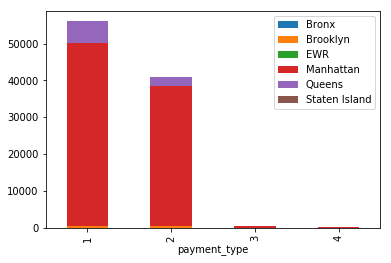

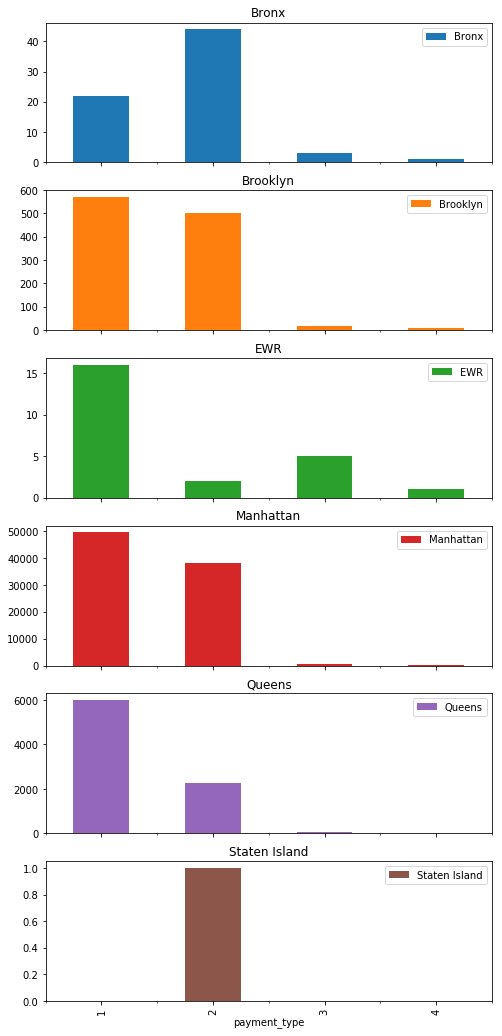

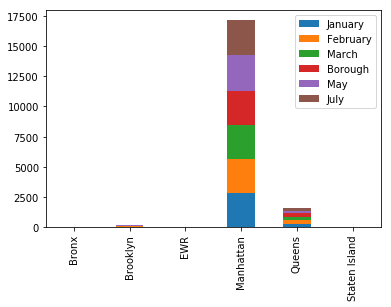

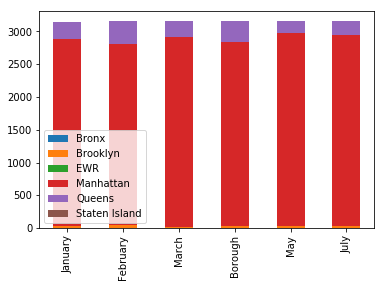

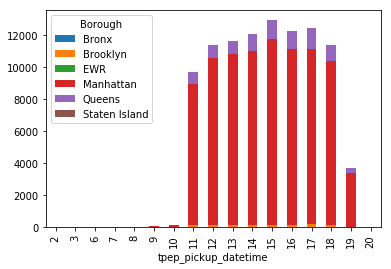

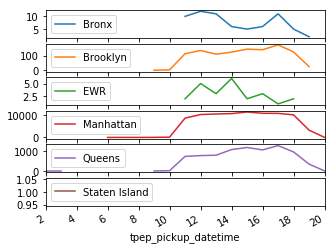

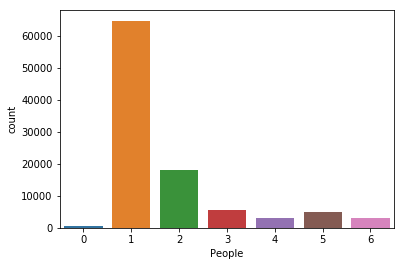

In [445]:
plt.figure(figsize = (6,4))
sns.countplot(mergedata['passenger_count'])
plt.xlabel("People")
plt.show()

In [ ]:
mergedata.trip_distance.describe()

In [ ]:
df.trip_distance[df.trip_distance==0].count()
#Trips that have a zero distance

In [446]:
mergedata['tpep_pickup_datetime'] = pd.to_datetime(mergedata['tpep_pickup_datetime'])
mergedata['tpep_dropoff_datetime'] = pd.to_datetime(mergedata['tpep_dropoff_datetime'])

mergedata['weekday'] = mergedata['tpep_pickup_datetime'].dt.weekday_name
mergedata['month'] = mergedata['tpep_pickup_datetime'].dt.month
mergedata['weekday_num'] = mergedata['tpep_pickup_datetime'].dt.weekday
mergedata['pickup_hour'] = mergedata['tpep_pickup_datetime'].dt.hour
mergedata['day'] = mergedata['tpep_pickup_datetime'].dt.date
#Number of Trips per Day depends on the pickup time. and converting the tpep_pickup_datetime in to datetime formate

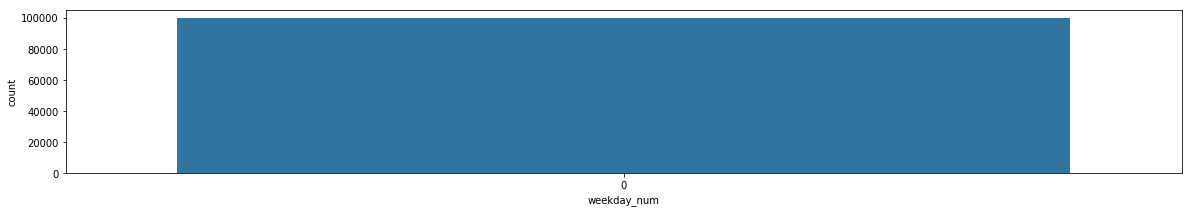

In [447]:
plt.figure(figsize = (20,3))
sns.countplot(mergedata.weekday_num)
plt.show()

In [448]:
mergedata['trip_duration'] = (mergedata.tpep_dropoff_datetime - mergedata.tpep_pickup_datetime).dt.total_seconds()
#we converting trip duration into seconds.

In [449]:
mergedata.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.00,7,...,1,0,11,2018-01-01,1323.0
1,2018-01-01 11:46:24,2018-01-01 11:48:48,1,0.48,7,...,1,0,11,2018-01-01,144.0
2,2018-01-01 11:49:24,2018-01-01 11:51:26,1,0.50,7,...,1,0,11,2018-01-01,122.0
3,2018-01-01 11:33:28,2018-01-01 12:00:05,2,7.10,7,...,1,0,11,2018-01-01,1597.0
4,2018-01-01 11:51:21,2018-01-01 11:56:57,1,1.20,7,...,1,0,11,2018-01-01,336.0


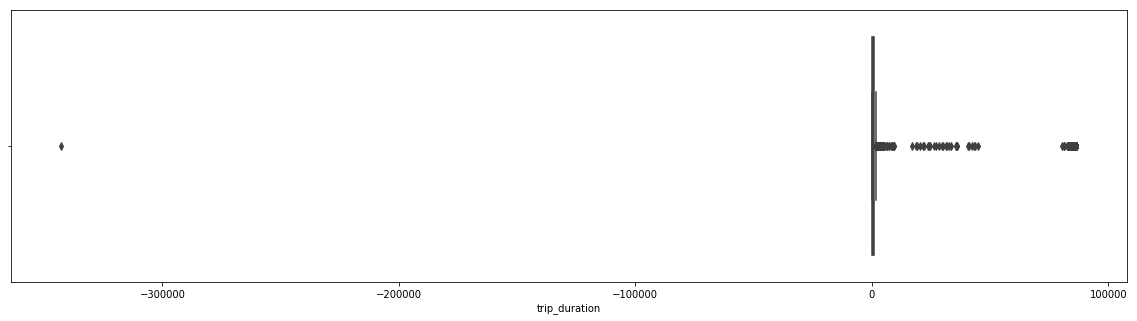

In [450]:
plt.figure(figsize = (20,5))
sns.boxplot(mergedata['trip_duration'])
plt.show()

In [451]:
ManhattanMD = mergedata[mergedata['Borough'] == 'Manhattan']

In [452]:
QueensMD = mergedata[mergedata['Borough'] == 'Queens']

In [453]:
BrooklynMD = mergedata[mergedata['Borough'] == 'Brooklyn']

In [454]:
StatenIslandMD = mergedata[mergedata['Borough'] == 'Staten Island']

In [455]:
EWRMD = mergedata[mergedata['Borough'] == 'EWR']

In [456]:
BronxMD = mergedata[mergedata['Borough'] == 'Bronx']

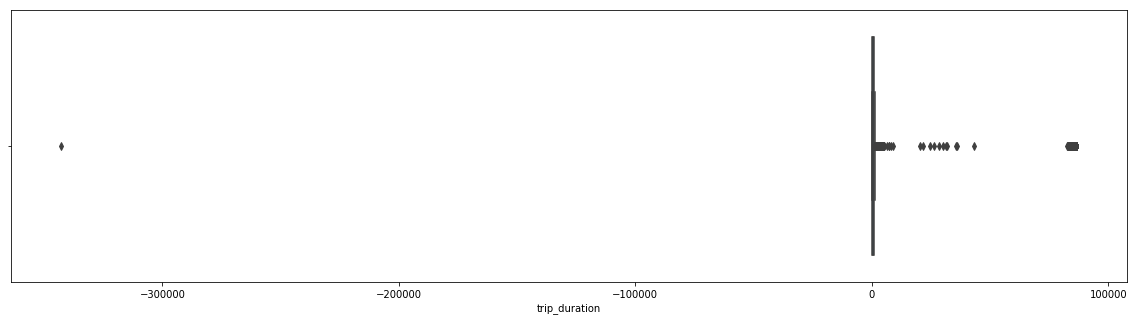

In [457]:
plt.figure(figsize = (20,5))
sns.boxplot(ManhattanMD['trip_duration'])
plt.show()    #Manhattan Trip Duration

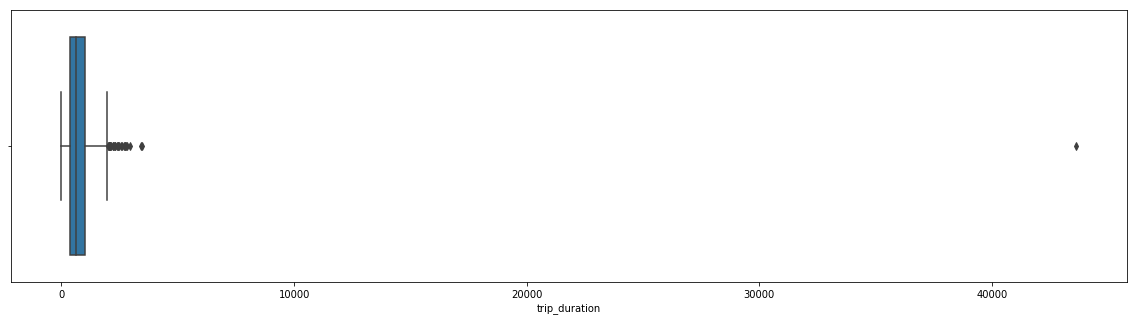

In [458]:
plt.figure(figsize = (20,5))
sns.boxplot(BrooklynMD['trip_duration'])
plt.show()    #Brooklyn Trip Duration

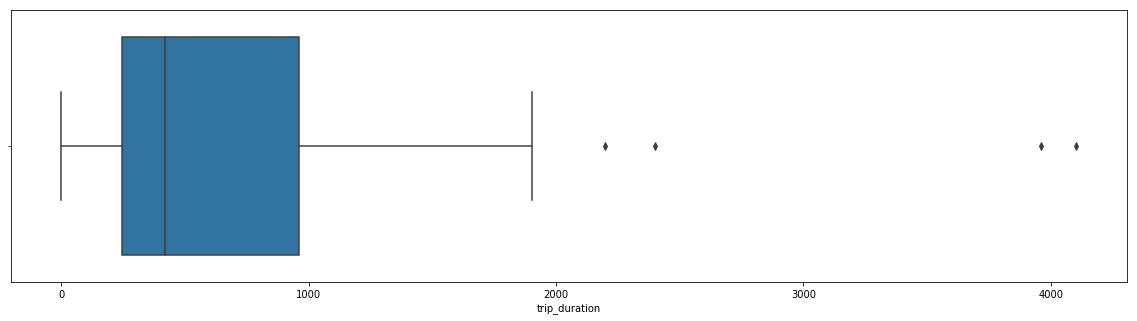

In [459]:
plt.figure(figsize = (20,5))
sns.boxplot(BronxMD['trip_duration'])
plt.show()         #Bronx Trip Duration

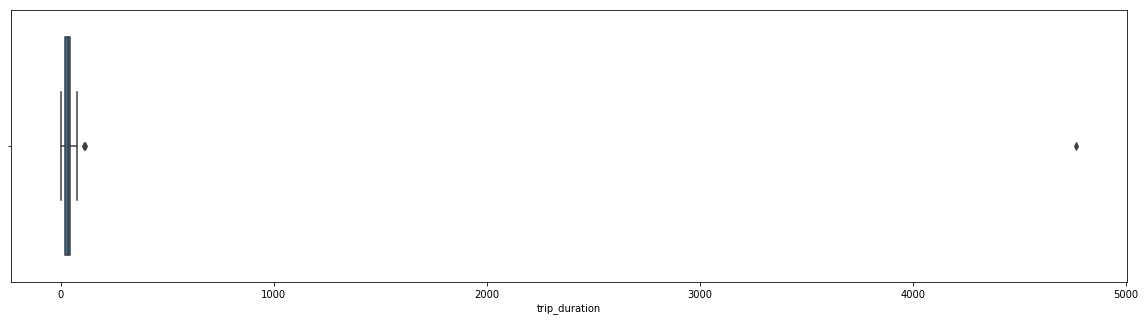

In [460]:
plt.figure(figsize = (20,5))
sns.boxplot(EWRMD['trip_duration'])
plt.show()        #EWR Trip Duration

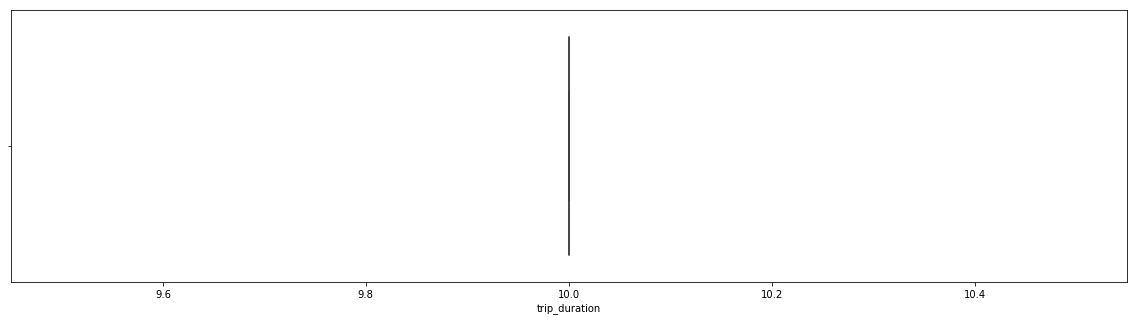

In [461]:
plt.figure(figsize = (20,5))
sns.boxplot(StatenIslandMD['trip_duration'])
plt.show()           #Staten Island Trip Duration

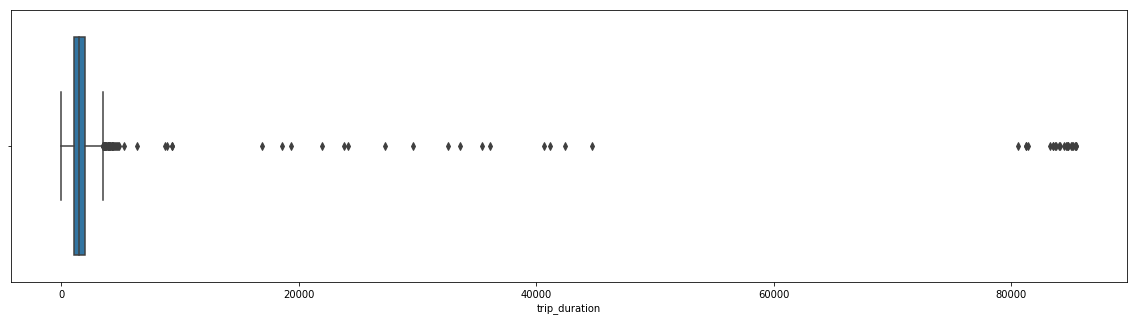

In [462]:
plt.figure(figsize = (20,5))
sns.boxplot(QueensMD['trip_duration'])
plt.show()         #Queens Trip Duration

In [463]:
#Trips that took more than 5000 Seconds Brooklyn
BrooklynMD[BrooklynMD.trip_duration> 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
55887,2018-01-01 11:05:24,2018-01-01 11:27:08,1,10.15,61,...,1,0,11,2018-01-01,1304.0
55888,2018-01-01 11:58:58,2018-01-01 12:13:12,1,3.46,61,...,1,0,11,2018-01-01,854.0
55889,2018-01-01 11:22:31,2018-01-01 11:25:02,1,0.00,61,...,1,0,11,2018-01-01,151.0
55890,2018-01-01 11:27:55,2018-01-01 11:28:46,1,0.00,61,...,1,0,11,2018-01-01,51.0
55891,2018-01-01 11:36:47,2018-01-01 11:38:03,1,0.00,61,...,1,0,11,2018-01-01,76.0


In [464]:
#Trips that took more than 5000 Seconds Queens
QueensMD[QueensMD.trip_duration> 5000].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
38,2018-01-01 12:42:12,2018-01-02 00:00:00,1,4.43,7,...,1,0,12,2018-01-01,40668.0
70797,2018-01-01 11:20:27,2018-01-02 09:42:26,2,9.84,132,...,1,0,11,2018-01-01,80519.0
70861,2018-01-01 11:34:40,2018-01-02 00:00:00,1,5.44,132,...,1,0,11,2018-01-01,44720.0
70964,2018-01-01 03:24:27,2018-01-02 02:56:38,1,20.53,132,...,1,0,3,2018-01-01,84731.0
71147,2018-01-01 12:12:56,2018-01-02 00:00:00,1,14.86,132,...,1,0,12,2018-01-01,42424.0


In [465]:
#Trips that took more than 5000 Seconds EWR
EWRMD[EWRMD.trip_duration> 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
99642,2018-01-01 11:35:24,2018-01-01 12:54:50,1,39.2,1,...,1,0,11,2018-01-01,4766.0
99643,2018-01-01 11:07:10,2018-01-01 11:07:17,5,0.0,1,...,1,0,11,2018-01-01,7.0
99644,2018-01-01 12:26:03,2018-01-01 12:26:39,3,8.1,1,...,1,0,12,2018-01-01,36.0
99645,2018-01-01 12:56:21,2018-01-01 12:56:43,3,0.0,1,...,1,0,12,2018-01-01,22.0
99646,2018-01-01 12:33:06,2018-01-01 12:33:26,2,0.0,1,...,1,0,12,2018-01-01,20.0


In [466]:
#Trips that took more than 5000 Seconds Bronx
BronxMD[BronxMD.trip_duration> 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
98160,2018-01-01 11:23:15,2018-01-01 12:29:17,2,15.28,168,...,1,0,11,2018-01-01,3962.0
98161,2018-01-01 11:17:53,2018-01-01 11:25:31,1,2.50,168,...,1,0,11,2018-01-01,458.0
98162,2018-01-01 12:39:03,2018-01-01 12:50:31,3,6.29,168,...,1,0,12,2018-01-01,688.0
98163,2018-01-01 13:56:19,2018-01-01 13:59:31,1,0.70,168,...,1,0,13,2018-01-01,192.0
98164,2018-01-01 14:54:24,2018-01-01 14:59:11,1,0.78,168,...,1,0,14,2018-01-01,287.0


In [467]:
#Trips that took more than 5000 Seconds Staten Island 
StatenIslandMD[StatenIslandMD.trip_duration> 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
99988,2018-01-01 17:18:24,2018-01-01 17:18:34,1,0.0,156,...,1,0,17,2018-01-01,10.0


In [468]:
#Trips that took more than 5000 Seconds Manhatten
ManhattanMD[ManhattanMD.trip_duration> 5000].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,month,weekday_num,pickup_hour,day,trip_duration
344,2018-01-01 12:07:03,2018-01-02 11:26:04,1,2.59,261,...,1,0,12,2018-01-01,83941.0
621,2018-01-01 14:58:33,2018-01-02 14:56:21,5,1.28,261,...,1,0,14,2018-01-01,86268.0
723,2018-01-01 15:07:32,2018-01-02 00:00:00,2,0.99,261,...,1,0,15,2018-01-01,31948.0
728,2018-01-01 15:24:18,2018-01-02 15:22:32,1,6.74,261,...,1,0,15,2018-01-01,86294.0
792,2018-01-01 15:05:09,2018-01-02 15:01:55,1,8.50,261,...,1,0,15,2018-01-01,86206.0


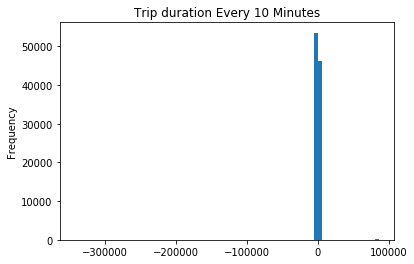

In [469]:
plt.figure(figsize = (6,4))
plt.title("Trip duration Every 10 Minutes")
mergedata.trip_duration.plot.hist(bins=80)
plt.show()

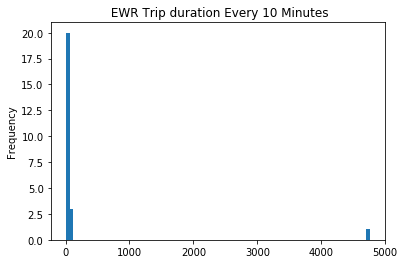

In [470]:
plt.figure(figsize = (6,4))
plt.title(" EWR Trip duration Every 10 Minutes")

EWRMD.trip_duration.plot.hist(bins=80)
plt.show()

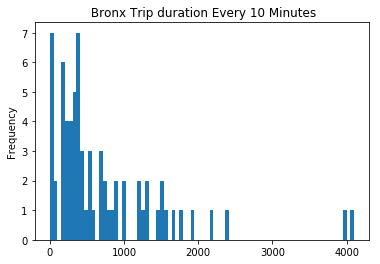

In [471]:
plt.figure(figsize = (6,4))
plt.title(" Bronx Trip duration Every 10 Minutes")

BronxMD.trip_duration.plot.hist(bins=80)
plt.show()

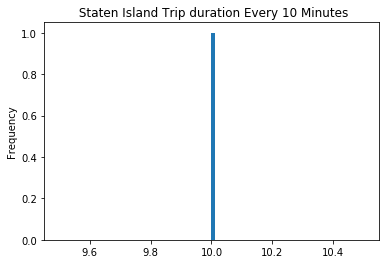

In [472]:
plt.figure(figsize = (6,4))
plt.title(" Staten Island Trip duration Every 10 Minutes")

StatenIslandMD.trip_duration.plot.hist(bins=80)
plt.show()

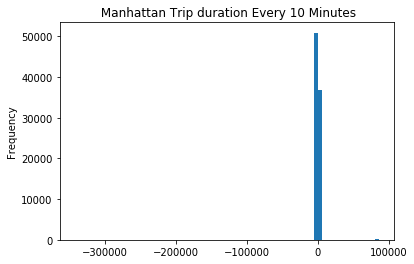

In [473]:
plt.figure(figsize = (6,4))
plt.title(" Manhattan Trip duration Every 10 Minutes")

ManhattanMD.trip_duration.plot.hist(bins=80)
plt.show()

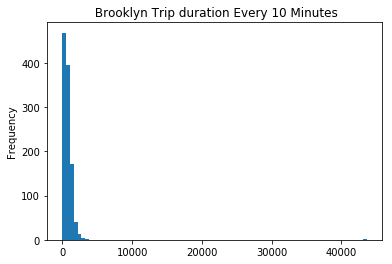

In [474]:
plt.figure(figsize = (6,4))
plt.title(" Brooklyn Trip duration Every 10 Minutes")
BrooklynMD.trip_duration.plot.hist(bins=80)
plt.show()

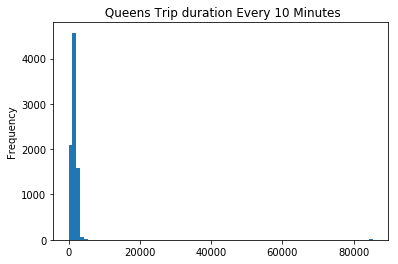

In [475]:
plt.figure(figsize = (6,4))
plt.title(" Queens Trip duration Every 10 Minutes")

QueensMD.trip_duration.plot.hist(bins=80)
plt.show()

<h1>RQ4</h1>

[RQ4] What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

In [80]:
nytaxi =pd.read_csv(Location_Jan, usecols=[7,9])

In [533]:
nytaxi[:3] 

,PULocationID,payment_type
0,7,2
1,261,2
2,237,1


In [534]:
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1]) 

In [535]:
nyBorough[:3]

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx


In [536]:
taxi_and_Borough=nytaxi.join(nyBorough.set_index('LocationID'), on='PULocationID')

In [537]:
df_grouped = taxi_and_Borough.groupby(['payment_type','Borough']).count() # group by payment type and borough
df_grouped = df_grouped.unstack()

In [538]:
df_grouped.columns = ['Bronx','Brooklyn','EWR','Manhattan','Queens','Staten Island','Unknown']
df_grouped = df_grouped.drop('Unknown', axis=1)


In [539]:
df_grouped[:3]

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
payment_type,,,,,,
1,22.0,570.0,16.0,49542.0,5994.0,NaN
2,44.0,502.0,2.0,37991.0,2277.0,1.0
3,3.0,16.0,5.0,413.0,64.0,NaN


In [540]:
df_grouped.plot.bar(stacked=True);

In [541]:
df_grouped.plot(subplots=True,figsize=(8,18),kind='bar') # Plot everything

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A90207D710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A9035554E0>], dtype=object)

In [542]:
sum_by_borough = df_grouped.sum()
sum_by_payment = df_grouped.sum(axis=1)
grandtotal = sum_by_borough.sum()

In [653]:
chi2, p, dof, expected = stats.chi2_contingency(df_grouped)

In [613]:
import warnings

warnings.simplefilter("error")

In [616]:
from scipy.misc import logsumexp


In [619]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [641]:
df_grouped.plot(subplots=True,figsize=(8,18),kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A91B442358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A91BB17780>], dtype=object)

<h1>RQ5</h1>

[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [75]:
nytaxi = pd.read_csv(Location_Jan, usecols=[1,2,4,7]) 

<p>Load and concatenate other months

In [76]:

nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Feb, usecols=[1,2,4,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Mar, usecols=[1,2,4,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Apr, usecols=[1,2,4,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_May, usecols=[1,2,4,7])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Jun, usecols=[1,2,4,7])])


In [77]:
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1])

<p> We've done this join to obtain a dataset which help to know the name of borough where trip starts

In [79]:
nytaxi = nytaxi.join(nyBorough.set_index('LocationID'), on='PULocationID')

In [589]:
# modify type of tpep_pickup_datetime to DateTime
nytaxi.tpep_pickup_datetime = pd.to_datetime(nytaxi.tpep_pickup_datetime) 

In [590]:
# modify type of tpep_dropoff_datetime to DateTime
nytaxi.tpep_dropoff_datetime = pd.to_datetime(nytaxi.tpep_dropoff_datetime)


In [591]:
# it computes trip duration
nytaxi['trip_duration'] = (nytaxi.tpep_dropoff_datetime - nytaxi.tpep_pickup_datetime).dt.total_seconds()

In [592]:
# it makes a plot where we can see relationship between trip duration and trip distance
# there are a lot of outliers
nytaxi.plot.hexbin(x='trip_duration', y='trip_distance')

In [593]:
# I clone the dataframe to make cleanings
nytaxi_clean = nytaxi

In [594]:
# I remove all the trips lasting less than 0 seconds and the ones lasting 0 seconds
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_duration<=0)].index)
# I remove all the trips with trip distance higher than 25000
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_distance > 25000)].index)
nytaxi_clean.plot.hexbin(x='trip_duration', y='trip_distance')

In [620]:
# I remove all the trips lasting more than 100000 seconds
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_duration > 100000)].index)
# I remove all the trips with trip distance higher than 400
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_distance > 400)].index)
nytaxi_clean.plot.hexbin(x='trip_duration', y='trip_distance')

In [596]:
# In order to clean the data, let's plot the trip_duration distribution
nytaxi_clean.trip_duration.plot.hist(100)

In [597]:
# Let's do a first cut to trip_duration 5000
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_duration > 5000)].index)
nytaxi_clean.trip_duration.plot.hist(100)

In [598]:
# Now let's plot the trip_distance distribution
nytaxi_clean.trip_distance.plot.hist(100)

In [599]:
# Let's do a first cut to trip_distance 35
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_distance > 35)].index)
nytaxi_clean.trip_distance.plot.hist(100)

In [623]:
# Let's see the new heatmap plot
nytaxi_clean.plot.hexbin(x='trip_duration', y='trip_distance')

In [625]:
# The plot is not clear, let's investigate the heatmaps for each Borough
nytaxi_clean[nytaxi_clean.Borough == 'Queens'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Queens')
nytaxi_clean[nytaxi_clean.Borough == 'Manhattan'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Manhattan')
nytaxi_clean[nytaxi_clean.Borough == 'EWR'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='EWR')
nytaxi_clean[nytaxi_clean.Borough == 'Staten Island'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Staten Island')
nytaxi_clean[nytaxi_clean.Borough == 'Brooklyn'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Brooklyn')
nytaxi_clean[nytaxi_clean.Borough == 'Bronx'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Bronx')
nytaxi_clean[nytaxi_clean.Borough == 'Unknown'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Unknown')


ValueError: hexbin requires x column to be numeric

In [602]:
# Queens is the borough with the mean trip_distance higher
# But there is also a strange concentration of trip lasting only few seconds
# Let's plot the distribution of the duration for Queens
nytaxi_clean[nytaxi_clean.Borough == 'Queens'].trip_duration.hist(bins=100)

In [603]:
# Let's remove trips with duration less than 60 seconds
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.trip_duration <60)].index)
nytaxi_clean[nytaxi_clean.Borough == 'Queens'].trip_duration.hist(bins=100)

In [626]:
# Let's replot everything with new scales
nytaxi_clean[nytaxi_clean.Borough == 'Queens'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Queens')
nytaxi_clean[nytaxi_clean.Borough == 'Manhattan'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Manhattan', xlim=(0,1800), ylim=(0,10))
nytaxi_clean[nytaxi_clean.Borough == 'EWR'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='EWR', xlim=(0,400), ylim=(0,3))
nytaxi_clean[nytaxi_clean.Borough == 'Staten Island'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Staten Island', xlim=(0,4000), ylim=(0,25))
nytaxi_clean[nytaxi_clean.Borough == 'Brooklyn'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Brooklyn', xlim=(0,1300), ylim=(0,6))
nytaxi_clean[nytaxi_clean.Borough == 'Bronx'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Bronx', xlim=(0,1300), ylim=(0,6))
nytaxi_clean[nytaxi_clean.Borough == 'Unknown'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Unknown', xlim=(0,1300), ylim=(0,5))

ValueError: hexbin requires x column to be numeric

In [605]:
# In the EWR plot we see that data is pushed close to trip_distance = 0
# Doing an histogram for trip_distance for EWR on the full dataframe nytaxi
# It's clear that almost all the trips have trip_distance = 0
# We guess this is because trips to/from the airport have a fixed tariff
# Thus the drivers do not register the trip distance but only the price
nytaxi[nytaxi.Borough == 'EWR'].trip_distance.hist(bins=100)


In [606]:
# Because of this, we decide to remove all the trips starting from EWR
nytaxi_clean = nytaxi_clean.drop(nytaxi_clean[(nytaxi_clean.Borough == "EWR")].index)

In [607]:
# it shows if exist correlation between trip duration and trip distance
nytaxi_clean['trip_duration'].corr(nytaxi_clean['trip_distance'])

0.83627887185109417

<h1>CRQ1</h1>
<p>Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

<ul>Considering the fare amount:

<li>Compute the price per mile equation for each trip.</li>
<li>Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?</li>
<li>Run the t-test among all the possible pairs of distribution of different boroughs.</li>
<li>Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?</li>
The price per mile might depend on traffic the Taxi finds on its way. So we try to mitigate this effect:

<li>Likely, the duration of the trip says something about the city's congestion, especially if combined with the distances. It might be a good idea to weight the price for mile using the time equation needed to complete the trip. Thus, instead of equation, you can use equation, where equation is the time needed to complete the trip.</li>
<li>Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?</li>
<li>Run the t-test among all the possible pairs of new distribution of different boroughs.</li>
<li>Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?</li>
Compare the results obtained for the price per mile and the weighted price for mile. What do you think about that?</ul></p>
<h1>Libraries</h1>
<p>Let's import all the needed libraries</p>

In [655]:
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",10)

<h2>Datasets</h2>

Here we load all the datasets

In [657]:
nytaxi = pd.read_csv(Location_Jan, usecols=[1,2,4,7,8,10,16]) 
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Feb, usecols=[1,2,4,7,8,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Mar, usecols=[1,2,4,7,8,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Apr, usecols=[1,2,4,7,8,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_May, usecols=[1,2,4,7,8,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Jun, usecols=[1,2,4,7,8,10,16])])
nytaxi.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount
0,2018-01-01 11:22:49,2018-01-01 11:44:52,9.0,7,88,28.0,28.80
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2.9,261,164,11.0,11.80
2,2018-01-01 11:02:02,2018-01-01 11:06:12,0.5,237,163,5.0,7.25
3,2018-01-01 11:13:44,2018-01-01 11:23:48,1.5,163,246,8.5,9.30
4,2018-01-01 11:33:51,2018-01-01 11:44:12,2.8,48,249,10.5,11.30


Now we need to add a new column with the indication of the Borough. We decide to use the pick up location as reference

In [658]:
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1])
df_full = nytaxi.join(nyBorough.set_index('LocationID'), on='PULocationID')
df_full.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,total_amount,Borough
0,2018-01-01 11:22:49,2018-01-01 11:44:52,9.0,7,88,28.0,28.80,Queens
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2.9,261,164,11.0,11.80,Manhattan
2,2018-01-01 11:02:02,2018-01-01 11:06:12,0.5,237,163,5.0,7.25,Manhattan
3,2018-01-01 11:13:44,2018-01-01 11:23:48,1.5,163,246,8.5,9.30,Manhattan
4,2018-01-01 11:33:51,2018-01-01 11:44:12,2.8,48,249,10.5,11.30,Manhattan


In order to make calculations with dates, we need to convert the column type to 'datetime'

In [659]:
df_full.tpep_pickup_datetime = pd.to_datetime(df_full.tpep_pickup_datetime)
df_full.tpep_dropoff_datetime = pd.to_datetime(df_full.tpep_dropoff_datetime)

We clone the full dataframe to make cleanings on it and keep the original data saved somewhere

In [660]:
df_clean = df_full

<h2>Data exploration</h2>

Let's start cleaning up the data. First thing is to remove all the trips with 'tpep_pickup' < 2017 and > 2019, they probably are errors

In [661]:
df_clean = df_clean[df_clean.tpep_pickup_datetime.dt.year > 2017]
df_clean = df_clean[df_clean.tpep_pickup_datetime.dt.year < 2019]

Let's create a new column 'trip_duration' with the trip duration in seconds, we'll need it later. We also need to remove all the trips with a duration equal or lower than 0

In [662]:
df_clean['trip_duration'] = (df_clean.tpep_dropoff_datetime - df_clean.tpep_pickup_datetime).dt.total_seconds()
# Remove all the trips with duration null or negative
df_clean = df_clean[df_clean.trip_duration > 0]

According the analysis ran in RQ5, we remove from the dataset all the trips started from the Borough 'EWR'. Indeed, we discovered that trips from/to the airport have a fixed tariff, and the 'trip_distance' field is kept to 0 by the system

In [663]:
df_clean = df_clean[df_clean.Borough != 'EWR']

Let's check the mean values for all the features by Borough


In [682]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean= grouped_mean.drop(['PULocationID','DOLocationID'], axis=1) # Remove not relevant columns
grouped_mean

,trip_distance,fare_amount,total_amount,trip_duration
Borough,,,,
Bronx,3.864238,14.686534,16.847307,869.238411
Brooklyn,3.473495,13.782054,16.484145,839.277267
Manhattan,2.220330,10.275759,12.859548,662.046427
Queens,11.719450,35.103026,44.494474,1733.268737
Staten Island,6.400000,27.500000,32.575000,644.500000
Unknown,2.923641,12.238212,15.297473,741.093440


The following peculiarities are found:

<li>Queens has the highest average on 'trip_distance'</li>
<li>Staten Island has the highest 'fare_amount' average</li>
<li>Queens has the highest average 'trip_duration'</li>

<h2>'trip_distance'</h2>

It's time to start exploring the data. Here we check the distribution of the feature 'trip_distance'

In [665]:
df_clean['trip_distance'].plot.box()

According to RQ5, let's do a first cut at 150

In [666]:
df_clean = df_clean[df_clean.trip_distance < 150]
df_clean['trip_distance'].plot.hist(bins=100, title="Distribution of 'trip_distance'")

Let's investigate Queens 'trip_distance', because it's the borough with the highest mean

In [667]:
queens = df_clean[df_clean.Borough == "Queens"] # Select all trips from Queens
queens['trip_distance'].plot.hist(bins=80, title="Distribution of 'trip_distance' in Queens")

Analyzing the histogram we decide to cut out all the trips with distance > 35. This seems a reasonable value to say that trips inside New York hardly cover more than this mileage. We can also cut out trips with distance less or equal to zero.

In [668]:
df_clean = df_clean.drop(df_clean[df_clean.trip_distance <= 0].index) # remove rows with trip distance <= 0
df_clean = df_clean.drop(df_clean[df_clean.trip_distance > 35].index) # remove rows with trip distance > 35
df_clean['trip_distance'].plot.hist(bins=100, title="Distribution of 'trip_distance'")

<h1>'total_amount'</h1>

Analysing the NYC Taxi Information document, we found out that there is a minimum fare of 2.5$. Thus, we can remove trips with 'total_amount' < 2.50 .

In [669]:
df_clean = df_clean.drop(df_clean[df_clean.total_amount < 2.5].index)

<h2>'fare_amount</h2>

Now it's time to investigate the feature 'fare_amount'

In [670]:
df_clean['fare_amount'].plot.box()

We can clearly see two outliers staind at around 200000. We cut them out together with the values below or equal to zero

In [671]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount <= 0].index) # remove rows with fare_amount <= 0
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 50000].index) # remove rows with fare_amount > 50000
df_clean['fare_amount'].plot.box()

We see other outliers above 2000, we can remove them

In [672]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 2000].index) # remove rows with fare_amount > 2000
df_clean['fare_amount'].plot.box()

We do another cut at 800

In [673]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 800].index) # remove rows with fare_amount > 800
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

The plot is still unbalanced, we do another cut at 150

In [674]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 150].index)
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

Staten Island is the Borough with the highes fare amount, let's check its distribution

In [675]:
df_clean[df_clean.Borough == 'Staten Island'].fare_amount.plot.hist(bins = 100, title="Distribution of 'fare_amount' in Staten Island")

From this plot we can see that the distribution is almost null after 110. Thus we can cut there without risking to remove important data

In [676]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 110].index) # remove rows with fare_amount > 110
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

<h1>'trip_duration'</h1>

Let's check the feature 'trip_duration'

In [677]:
df_clean.trip_duration.plot.box()

There are three outliers, we remove them. We can remove also trips with 'trip_duration' lower or equal to 60, and > 7500, according to RQ5

In [678]:
df_clean = df_clean.drop(df_clean[df_clean.trip_duration <= 60].index)
df_clean = df_clean.drop(df_clean[df_clean.trip_duration > 7500].index)
df_clean.trip_duration.plot.hist(bins=100, title="Distribution of 'trip_duration'")

At this point we can consider most of the outliers removed.

<h2>Dealing with 'Unknown' borough</h2>

In the dataset we have many rows with 'Unknown' borough. We want to try to re-allocate the trips to the borough with the closest behaviour.

Let's recalculate the means and the stds for the boroughs.

In [681]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'],axis=1) # Remove not relevant columns
grouped_mean

,trip_distance,fare_amount,total_amount,trip_duration
Borough,,,,
Bronx,3.864238,14.686534,16.847307,869.238411
Brooklyn,3.473495,13.782054,16.484145,839.277267
Manhattan,2.220330,10.275759,12.859548,662.046427
Queens,11.719450,35.103026,44.494474,1733.268737
Staten Island,6.400000,27.500000,32.575000,644.500000
Unknown,2.923641,12.238212,15.297473,741.093440


According to the means, trips from 'Unknown' seems to be similar to the trips from 'Manhattan'.

Let's compare the distributions of the features in these two boroughs in order to have some more valid proof.

In [683]:
unknown = df_clean[df_clean.Borough == "Unknown"] # Select all trips from Unknown
manhattan = df_clean[df_clean.Borough == "Manhattan"] # Select all trips from Manhattan

This is the 'trip_distance' distribution comparison using a normalized histogram.

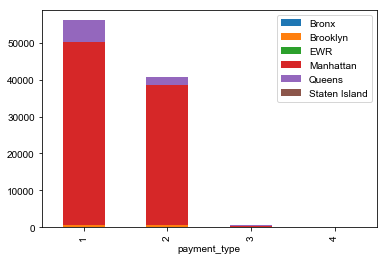

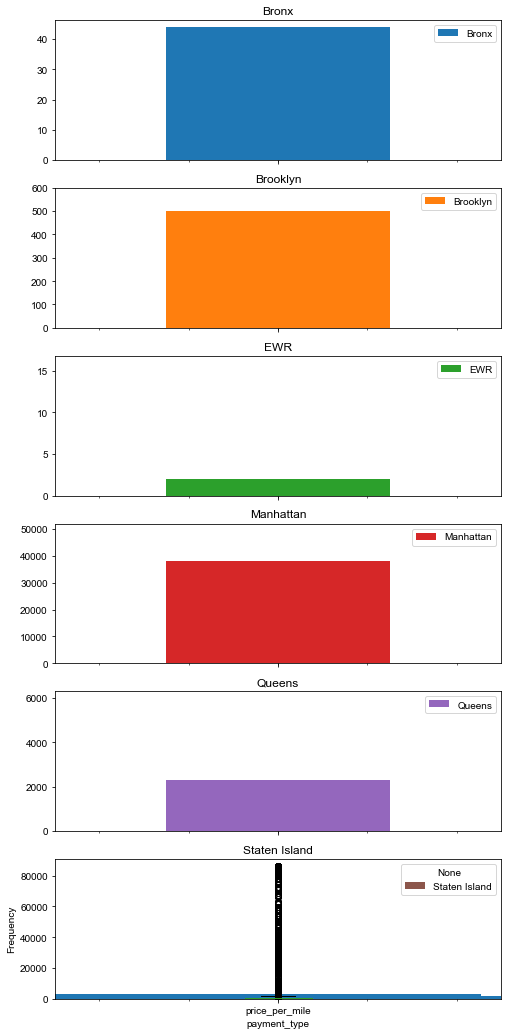

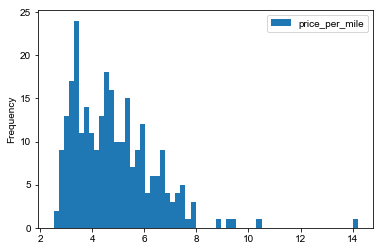

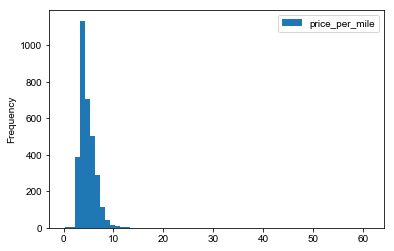

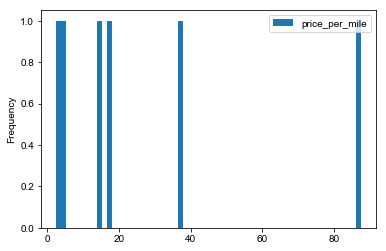

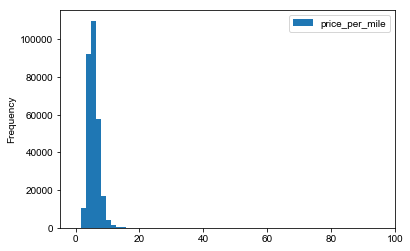

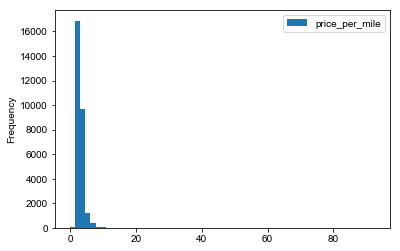

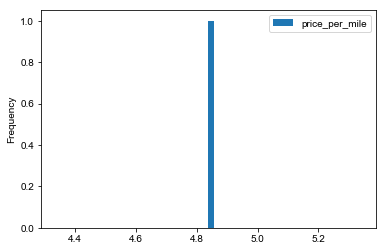

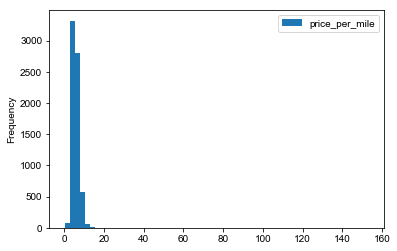

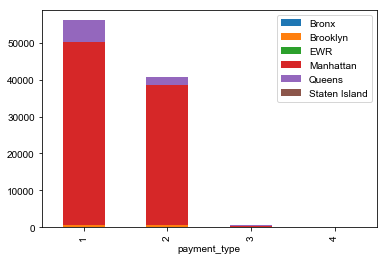

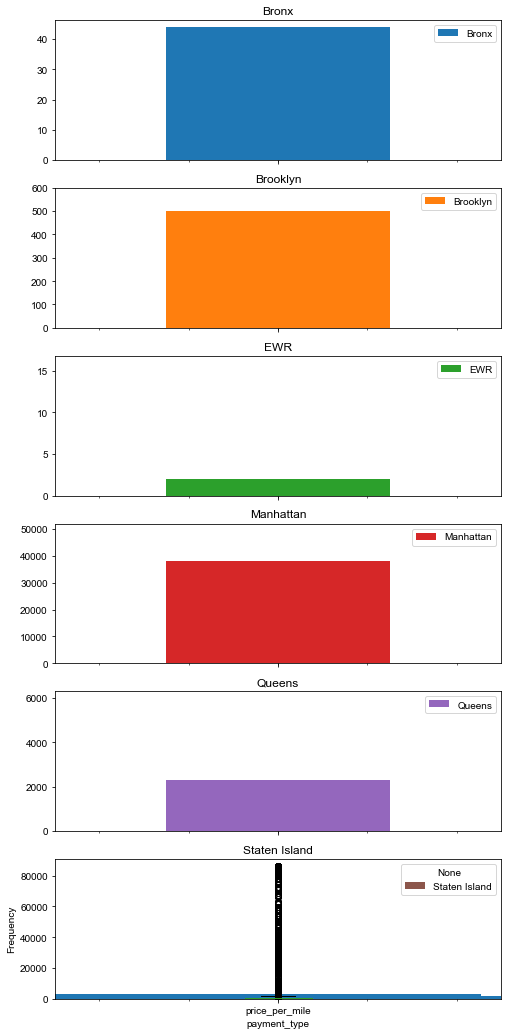

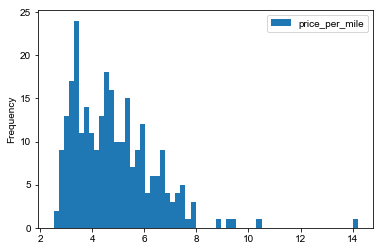

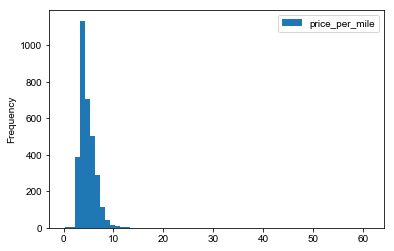

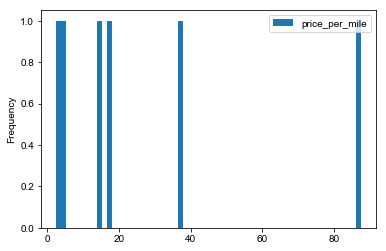

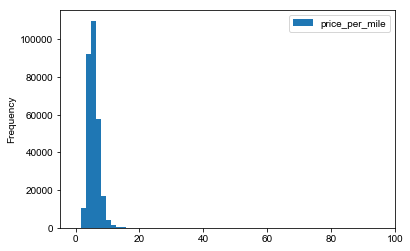

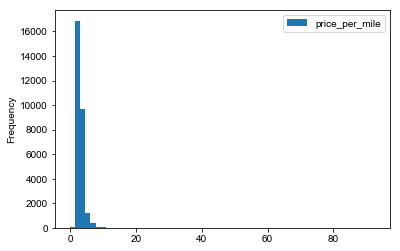

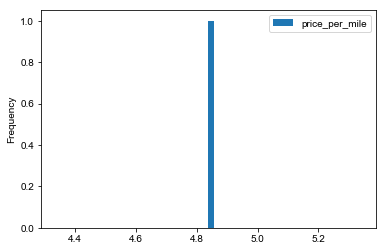

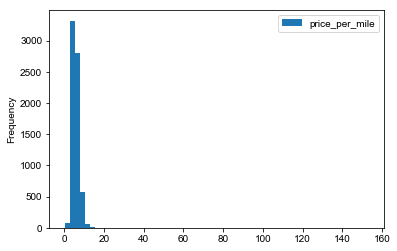

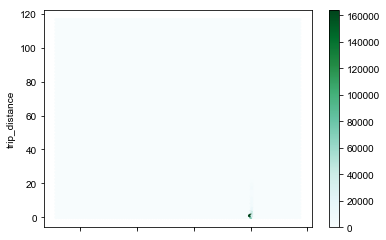

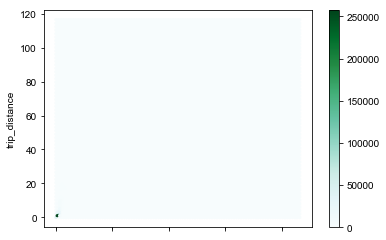

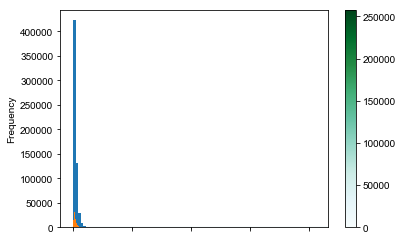

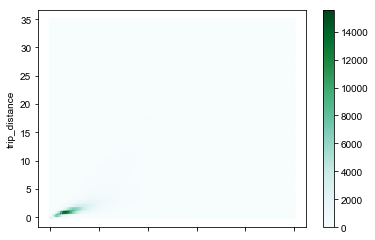

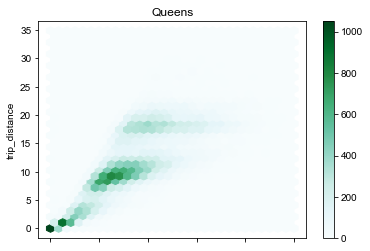

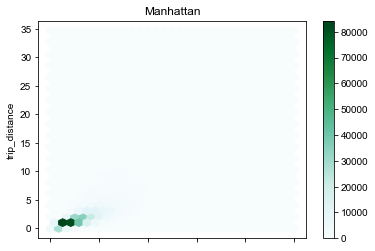

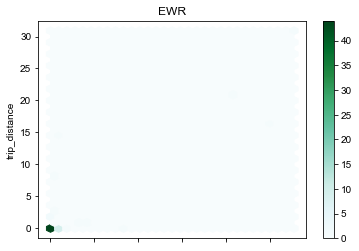

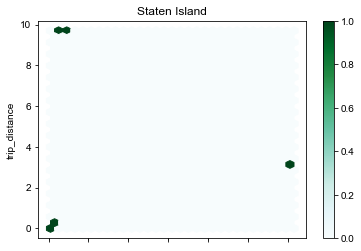

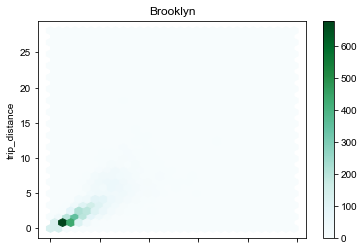

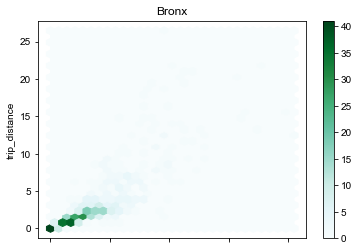

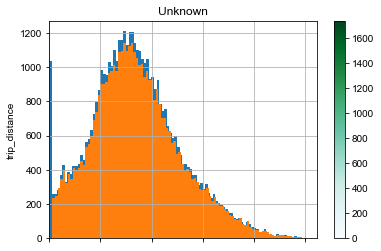

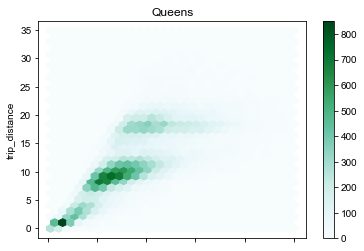

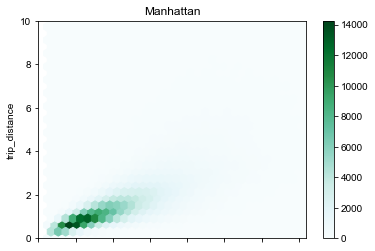

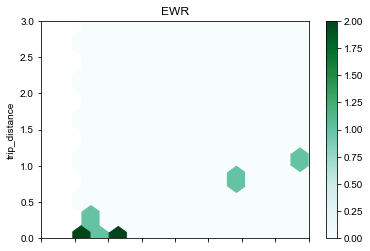

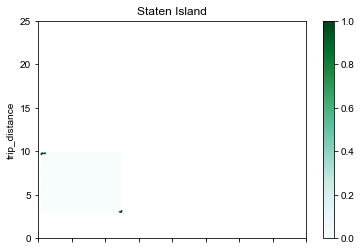

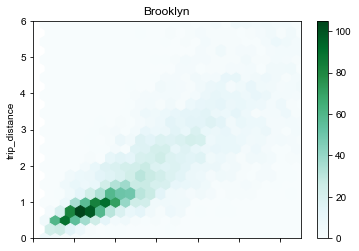

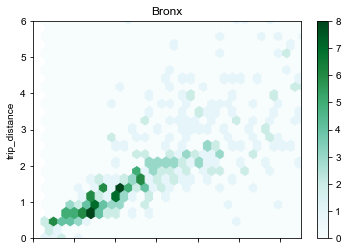

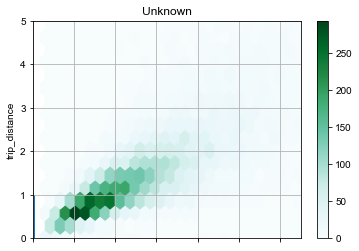

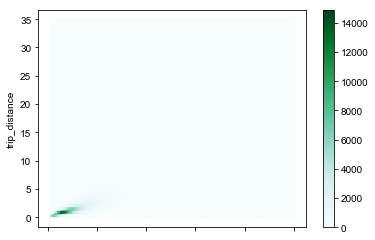

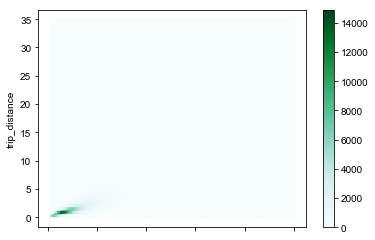

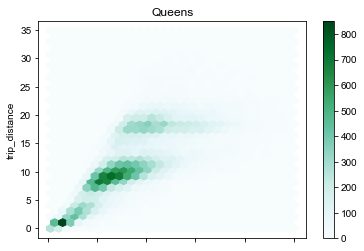

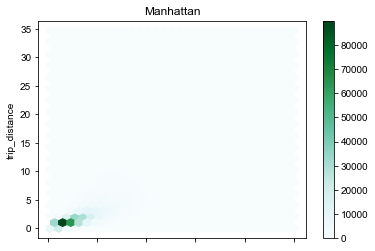

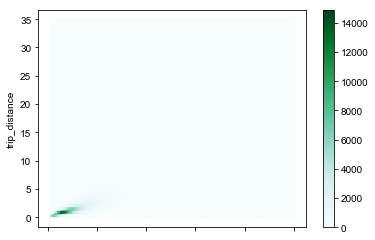

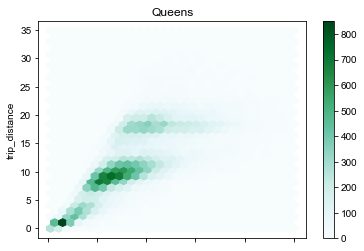

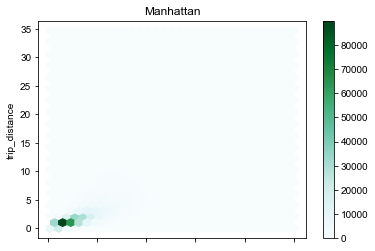

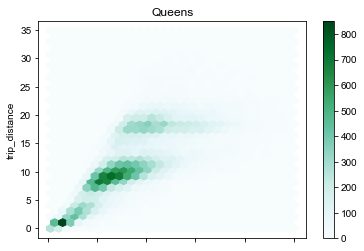

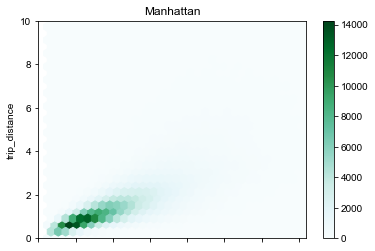

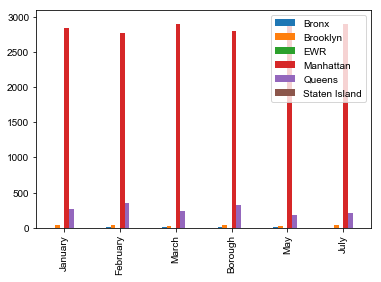

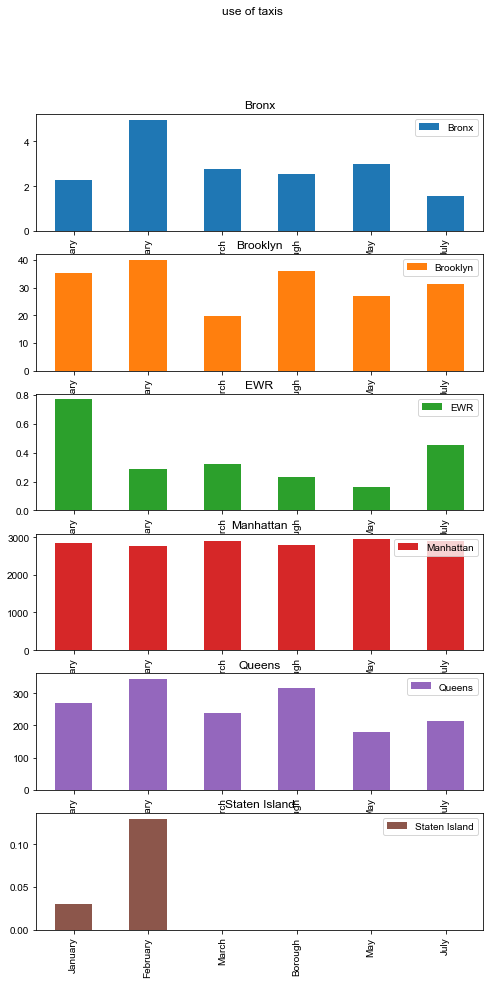

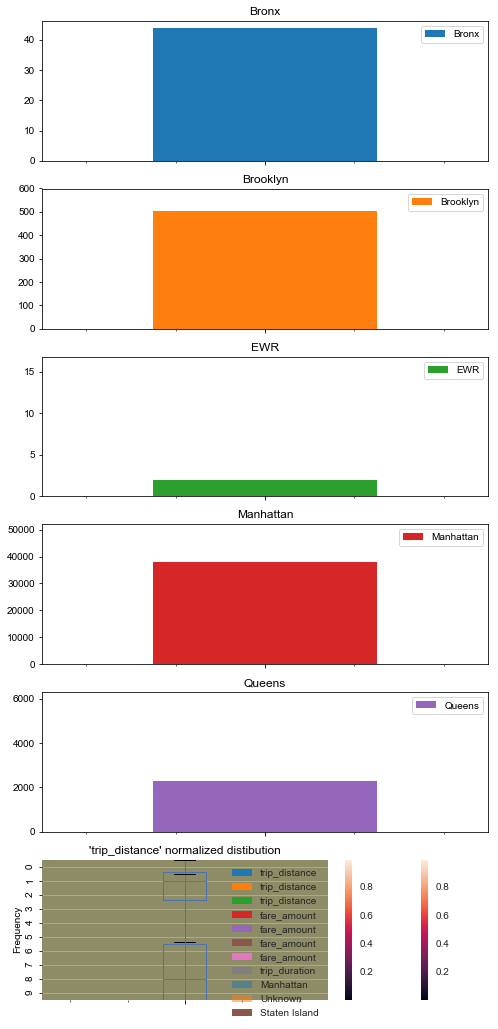

In [687]:
bins = pd.np.linspace(0, 35, 100)

pyplot.hist(manhattan.trip_distance, bins, alpha=0.5, label='Manhattan')
pyplot.hist(unknown.trip_distance, bins, alpha=0.5, label='Unknown')
pyplot.legend(loc='upper right')
pyplot.title('\'trip_distance\' normalized distibution')
pyplot.show()

In [685]:
import matplotlib.pyplot as plt


This is the 'trip_duration' distribution comparison using a normalized histogram.

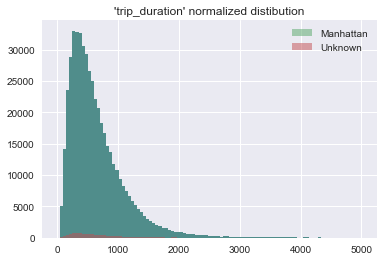

In [689]:
bins = pd.np.linspace(0, 5000, 100)

pyplot.hist(manhattan.trip_duration, bins, alpha=0.5, label='Manhattan')
pyplot.hist(unknown.trip_duration, bins, alpha=0.5, label='Unknown')
pyplot.legend(loc='upper right')
pyplot.title('\'trip_duration\' normalized distibution')
pyplot.show()

This is the 'fare_amount' distribution comparison using a normalized histogram

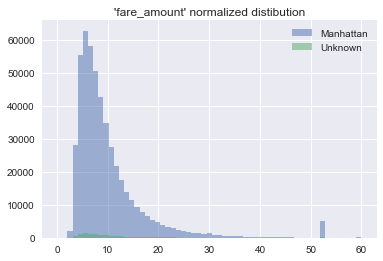

In [690]:
bins = pd.np.linspace(0, 60, 60)

pyplot.hist(manhattan.fare_amount, bins, alpha=0.5, label='Manhattan')
pyplot.hist(unknown.fare_amount, bins, alpha=0.5, label='Unknown')
pyplot.legend(loc='upper right')
pyplot.title('\'fare_amount\' normalized distibution')
pyplot.show()

In all the three previouses plots, the features showed pratically the same trend between 'Unknown' and 'Manhattan'.

But, just to be sure, we decide to run also t-tests between the two sets.

In this case:

<li>H0: the boroughs are statistically the same</li>
<li>H1: the boroughs are statistically different</li>

In [691]:
stats.ttest_ind(manhattan['trip_distance'], unknown['trip_distance'])

Ttest_indResult(statistic=-27.750297627507685, pvalue=2.3175898240219135e-169)

In [692]:
stats.ttest_ind(manhattan['trip_duration'], unknown['trip_duration'])

Ttest_indResult(statistic=-16.834477047510521, pvalue=1.4194708264224952e-63)

In [693]:
stats.ttest_ind(manhattan['fare_amount'], unknown['fare_amount'])

Ttest_indResult(statistic=-25.835942719431529, pvalue=4.3649736334178744e-147)

Contrary than expected, we found no statistic evidence that 'Unknown' and 'Manhattan' are correlated, because p-value is 0 in all the tests.

Thus, we remove all the trips coming from Unknown borough.

In [694]:
df_clean = df_clean.drop(df_clean[df_clean.Borough == 'Unknown'].index)

At this point we can consider the dataset (mostly) clean and we can proceed with the analysis asked in CRQ1.

<h1>Does the fare for mile change across NY's borough?</h1>

In order to give an answer, we firstly need to create a new column called 'price_per_mile', filled with the ratio between the trip 'fare_amount' and 'trip_distance'.

In [695]:
df_clean['price_per_mile'] = df_clean.fare_amount / df_clean.trip_distance

Let's check the distribution of the new 'price_per_mile' feature

In [696]:
df_clean.price_per_mile.plot.box()

There are some outliers. We'll cut out all the trips with a too high and too low 'price_per_mile'

In [697]:
df_clean = df_clean.drop(df_clean[df_clean.price_per_mile > 25].index) # remove rows with 'price_per_mile' > 25
df_clean = df_clean.drop(df_clean[df_clean.price_per_mile < 1].index) # remove rows with 'price_per_mile' < 1

df_clean.price_per_mile.plot.hist(bins=100, title="Distribution of 'price_per_mile'")

Now that outliers are removed, we can recalculate the mean and the std for all the features.

In [699]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'], axis=1)
grouped_mean

,trip_distance,fare_amount,total_amount,trip_duration,price_per_mile
Borough,,,,,
Bronx,3.823483,14.582090,16.752040,856.253731,5.081212
Brooklyn,3.486402,13.795104,16.503437,843.955687,5.056166
Manhattan,2.224045,10.273456,12.855135,662.829302,5.979258
Queens,11.733915,35.091114,44.481346,1735.427987,3.320990
Staten Island,3.100000,15.000000,16.800000,1229.000000,4.838710


In [700]:
grouped_std = df_clean.groupby(['Borough']).std()
grouped_std = grouped_std.drop(['PULocationID','DOLocationID'], axis=1)
grouped_std

,trip_distance,fare_amount,total_amount,trip_duration,price_per_mile
Borough,,,,,
Bronx,4.188058,11.531567,13.025886,624.504161,2.035822
Brooklyn,3.286244,9.745598,11.158972,596.841994,1.978206
Manhattan,2.649956,7.931055,9.753048,494.661039,2.209592
Queens,5.882334,15.350123,19.767642,854.425067,1.251150
Staten Island,NaN,NaN,NaN,NaN,NaN


And if we plot the distributions of the various boroughs:

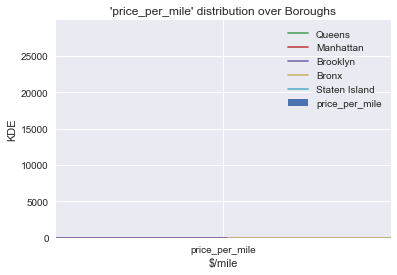

In [701]:
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Queens"],label='Queens', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Manhattan"],label='Manhattan', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Brooklyn"],label='Brooklyn', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Bronx"],label='Bronx', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Staten Island"],label='Staten Island', bw=0.5)

plt.xlabel('$/mile')
plt.ylabel('KDE')
plt.title('\'price_per_mile\' distribution over Boroughs')
plt.show()

Let's do a t-test on the 'price_per_mile' series

<li>H0: means are the same</li>
<li>H1: means are different</li>

Our p-value treshold is p-value = 0.05

In [702]:
ttest_matrix = pd.DataFrame(index=df_clean.Borough.unique(), columns=df_clean.Borough.unique())

for col1 in df_clean.Borough.unique():
    for col2 in df_clean.Borough.unique():
        ttest_matrix.loc[col1,col2] = stats.ttest_ind(df_clean[df_clean.Borough == col1]['price_per_mile'], df_clean[df_clean.Borough == col2]['price_per_mile']).pvalue
        if col1==col2:
            break
            
ttest_matrix = ttest_matrix.apply(pd.to_numeric)
ttest_matrix

,Queens,Manhattan,Brooklyn,Bronx,Staten Island
Queens,1.000000e+00,NaN,NaN,NaN,NaN
Manhattan,0.000000e+00,1.000000e+00,NaN,NaN,NaN
Brooklyn,0.000000e+00,3.481005e-180,1.000000,NaN,NaN
Bronx,8.190326e-169,3.778875e-16,0.807885,1.0,NaN
Staten Island,NaN,NaN,NaN,NaN,NaN


We consider pvalue = 0.05 as a treshold to reject the H0. Pvalues higher than 0.05 mean that Boroughs have the same mean (we accept the H0) Pvalues lower than 0.05 mean that Boroughs have different mean (we reject the H0)

H0 is rejected for all the pairs.

Second part of CRQ1 asks us to adjust the price per mile taking in account the traffic.

This is done creating a new feature dividing 'price_per_mile' by 'trip_duration.

We create a new column with 'ppm_adj' with the adjusted price per mile.

In [703]:
df_clean['ppm_adj'] = df_clean.fare_amount/df_clean.trip_duration

df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,...,total_amount,Borough,trip_duration,price_per_mile,ppm_adj
0,2018-01-01 11:22:49,2018-01-01 11:44:52,9.0,7,88,...,28.80,Queens,1323.0,3.111111,0.021164
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2.9,261,164,...,11.80,Manhattan,613.0,3.793103,0.017945
2,2018-01-01 11:02:02,2018-01-01 11:06:12,0.5,237,163,...,7.25,Manhattan,250.0,10.000000,0.020000
3,2018-01-01 11:13:44,2018-01-01 11:23:48,1.5,163,246,...,9.30,Manhattan,604.0,5.666667,0.014073
4,2018-01-01 11:33:51,2018-01-01 11:44:12,2.8,48,249,...,11.30,Manhattan,621.0,3.750000,0.016908


Let's plot the distribution of the new feature for each borough

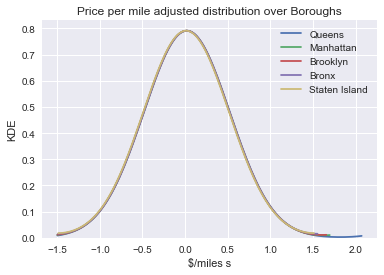

In [705]:
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Queens"],label='Queens', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Manhattan"],label='Manhattan', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Brooklyn"],label='Brooklyn', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Bronx"],label='Bronx', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Staten Island"],label='Staten Island', bw=0.5)

# beautifying the labels
plt.xlabel('$/miles s')
plt.ylabel('KDE')
plt.title('Price per mile adjusted distribution over Boroughs')
plt.show()

Now we can update the table with mean and std by borough adding the new columns

In [706]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'], axis=1)
grouped_mean

,trip_distance,fare_amount,total_amount,trip_duration,price_per_mile,ppm_adj
Borough,,,,,,
Bronx,3.823483,14.582090,16.752040,856.253731,5.081212,0.018103
Brooklyn,3.486402,13.795104,16.503437,843.955687,5.056166,0.017702
Manhattan,2.224045,10.273456,12.855135,662.829302,5.979258,0.016992
Queens,11.733915,35.091114,44.481346,1735.427987,3.320990,0.021359
Staten Island,3.100000,15.000000,16.800000,1229.000000,4.838710,0.012205


In [707]:
grouped_std = df_clean.groupby(['Borough']).std()
grouped_std = grouped_std.drop(['PULocationID','DOLocationID'], axis=1)
grouped_std

,trip_distance,fare_amount,total_amount,trip_duration,price_per_mile,ppm_adj
Borough,,,,,,
Bronx,4.188058,11.531567,13.025886,624.504161,2.035822,0.006009
Brooklyn,3.286244,9.745598,11.158972,596.841994,1.978206,0.005936
Manhattan,2.649956,7.931055,9.753048,494.661039,2.209592,0.005125
Queens,5.882334,15.350123,19.767642,854.425067,1.251150,0.008068
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we can perform a t-test over the new feature.

<li>H0: means are the same</li>
<li>H1: means are different</li>

P-value treshold is still pvalue = 0.05

In [708]:
ttest_matrix_adj = pd.DataFrame(index=df_clean.Borough.unique(), columns=df_clean.Borough.unique())

for col1 in df_clean.Borough.unique():
    for col2 in df_clean.Borough.unique():
        ttest_matrix_adj.loc[col1,col2] = stats.ttest_ind(df_clean[df_clean.Borough == col1]['ppm_adj'], df_clean[df_clean.Borough == col2]['ppm_adj']).pvalue
        if col1==col2:
            break

ttest_matrix_adj = ttest_matrix_adj.apply(pd.to_numeric)
ttest_matrix_adj

,Queens,Manhattan,Brooklyn,Bronx,Staten Island
Queens,1.000000e+00,NaN,NaN,NaN,NaN
Manhattan,0.000000e+00,1.000000e+00,NaN,NaN,NaN
Brooklyn,1.547025e-198,2.870759e-21,1.000000,NaN,NaN
Bronx,7.394957e-16,1.403684e-05,0.193975,1.0,NaN
Staten Island,NaN,NaN,NaN,NaN,NaN


We consider pvalue = 0.05 as a treshold to reject the H0. Pvalues higher than 0.05 mean that Boroughs have the same mean (we accept the H0) Pvalues lower than 0.05 mean that Boroughs have different mean (we reject the H0)

It happened that, again, all the boroughs have different means, so there are boroughs more expensive than others

<h1>CRQ2</h1>

Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries.

<h2>Libraries</h2>

Let's start importing libraries

In [716]:
import folium 
from IPython.display import HTML

ModuleNotFoundError: No module named 'folium'

In [715]:
pip install folium 


The following command must be run outside of the IPython shell:

    $ pip install folium 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


<h2>Data preparation</h2>

Now we create two dataframes, one for the pickup and one for the drop off, with the count of the trips referring a specific zone

In [718]:
df_grouped_pu = df_clean.groupby(['PULocationID']).count()
df_grouped_pu = df_grouped_pu['Borough']
df_grouped_pu.rename = ['count']
df_grouped_pu.head()

PULocationID
3      1
4    935
7    768
8      5
9      3
Name: Borough, dtype: int64

In [719]:
df_grouped_do = df_clean.groupby(['DOLocationID']).count()
df_grouped_do = df_grouped_do['Borough']
df_grouped_do.head()

DOLocationID
1    1151
3      39
4    2208
5       2
6       7
Name: Borough, dtype: int64

<h2>Choropleth map</h2>

We'll show this data on a choropleth map using Folium.

<h3>Map of the pick up zones</h3>

In [ ]:
ny_json= r"C:\Users\mikyl\Documents\GitHub\ADM-HW2-Group-3\data\taxi_zones.json"

taxiMap_pu = folium.Map(location=[40.7142700,-74.0059700], zoom_start=10)

taxiMap_pu.choropleth(geo_data=ny_json,
                     fill_color='YlGn', fill_opacity=0.8, line_opacity=0.5,
                     data = df_grouped_pu,
                     key_on='feature.properties.LocationID',
                     columns = [df_grouped_pu.index,'count'],
                     legend_name = 'Taxis trips'
                     )
folium.LayerControl().add_to(taxiMap_pu)

taxiMap_pu

Map of the drop off zones

In [ ]:
taxiMap_do = folium.Map(location=[40.7142700,-74.0059700], zoom_start=10)

taxiMap_do.choropleth(geo_data=ny_json,
                     fill_color='YlGn', fill_opacity=0.8, line_opacity=0.5,
                     data = df_grouped_do,
                     key_on='feature.properties.LocationID',
                     columns = [df_grouped_do.index,'count'],
                     legend_name = 'Taxis trips'
                     )
taxiMap_do

<h1>Considerations</h1>

We can see that there are some specific zones of the city that stands out compared to other zones.

In both maps:

<li>Zones around Central Park in Manhattan</li>
<li>Governor Island, Libery Island and Ellis Island in Manhattan</li>
<li>Fershkills Park in Staten Island</li>
<li>Great Kills Park in State Island</li>
<li>JFK Airport in Queens</li>
<li>LaGuardia Airport in Queens</li>

In the pick up map a couple of zones have a very high number of trips associated:

<li>New Dorp in Staten Island</li>
<li>Crotona Park in Bronx</li>

Many of the trips start or end in a park. It's a strong trend, that can be associated to tourists or to residents that want to spend some time at the open air.

The trips involving Governo Island, Liberty Island, Ellis Island and the two airports (JFK and LaGuardia) should be accounted mostly to the tourists.

New Dorp instead, seems to be a residential borough, full of commercial activities. Thus, probably people take a taxi from there because they need to go to work or because they just finished shopping and they are full of bags.

Zones around central park are full of offices, and this could be the reason of the high number of trips starting and ending there.

<h2>Further analysis</h2>

In order to better understand these trends, let's analyze the pick up zone and drop off zone together.

We create a new column with a string containing the pick up zone and the drop off zone. Then we group by this new feature, and count the occurrencies.

In the end, we plot the 10 most frequent trips.

In [ ]:
df_clean['PU_DO'] = df_clean["PULocationID"].map(str).add('p-d').add(df_clean["DOLocationID"].map(str))

df_pudo = df_clean.groupby(['PU_DO']).count()
df_pudo = df_pudo[['PULocationID']]
df_pudo = df_pudo.sort_values(by='PULocationID', ascending=False)

df_pudo[0:10].plot.bar()

<h2>Upper East Side in Manhattan</h2>

The most common trips involve zones 236 and 237. There are the codes respectivelu for 236 is the code respectively for Upper East Side North and Upper East Side South in Manhattan.

Upper East Side, according to Wikipedia, is one of the most affluent neighborhoods in New York. It is full of offices, libraries but also full of attractions, like museums (Guggenheim above all) consulates.

Seems that in the Upper East Side, it's common to take the cab for very short trips.

<h2>Upper West Side and Lincoln Square</h2>

Zones 238 and 239 refers to the Upper West Side, in Manhattan. This borough is geographically very close to the Upper East Side (it's just on the other side of Central Park).

Also, a lot of trips are between Upper West Side and Lincoln Square (142). There two neighborhoods are adiacent, and reflect the same behaviour of the Upper East Side, but with less volumes.

<h2>Midtown</h2>

Also in the top 10, there are trips between Upper East Side and Midtown (161 and 162). Midtown is right in the south of the Upper East Side, and it's something more than a short walk distance.

Midtown combines work activities and touristic activities. It is the neighborhood of the skyscrapers, but also Time Square, Madison Square Garden and Plaza Hotel, very touristic points of interest.

<h2>Conclusions</h2>

In the end, trips starting and ending in Manhattan are the most common. Appears that the taxi is cheap enough to cover also small distances. This conclusion could be already reached comparing the 'trip_distance' mean values of the various boroughs, Mahattan has the lowest one indeed (mean: 2.33, sts: 2,62).

Let's remember we removed all the trips lasting less than 60 seconds. After this last analysis, we can say that probably was not a good idea referring to Manhattan. A specific analysis on this borough could lead to different cleaning actions.